In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Загрузка датасета и создание оригинальной копии.

In [40]:
df = pd.read_csv("german_used_cars.csv", index_col=False)
df_original = df.copy()
df.rename(columns={df.columns[0]: "id"}, inplace=True)  # onnamed column into id column
df.set_index("id", drop=True, inplace=True)  # id col ass index
df.head(10)

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
id,,,,,,,,,,,,,,
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
5,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,47307.0,2.0 16V Twin Spark
6,alfa-romeo,Alfa Romeo 145,red,12/1996,1996,3500,110,150,Manual,Petrol,"8,8 l/100 km",210 g/km,230000.0,Quadrifoglio
7,alfa-romeo,Alfa Romeo 164,black,07/1996,1996,5500,132,179,Manual,Petrol,"13,4 l/100 km",320 g/km,168000.0,(3.0) V6 Super
8,alfa-romeo,Alfa Romeo Spider,black,07/1996,1996,8990,141,192,Manual,Petrol,11 l/100 km,265 g/km,168600.0,|HU:neu|Klimaanlage|Youngtimer|


#### Вывод общей информации.


In [41]:
display(df.shape)
display(df.info())
display(df.describe(include="all"))

(251079, 14)

<class 'pandas.core.frame.DataFrame'>
Index: 251079 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     251079 non-null  object 
 1   model                     251079 non-null  object 
 2   color                     250913 non-null  object 
 3   registration_date         251075 non-null  object 
 4   year                      251079 non-null  object 
 5   price_in_euro             251079 non-null  object 
 6   power_kw                  250945 non-null  object 
 7   power_ps                  250950 non-null  object 
 8   transmission_type         251079 non-null  object 
 9   fuel_type                 251079 non-null  object 
 10  fuel_consumption_l_100km  224206 non-null  object 
 11  fuel_consumption_g_km     251079 non-null  object 
 12  mileage_in_km             250927 non-null  float64
 13  offer_description         251078 non-null  object

None

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
count,251079,251079,250913,251075,251079,251079,250945,250950,251079,251079,224206,251079,2.509270e+05,251078
unique,47,1312,14,433,91,18228,596,578,4,136,621,1500,NaN,200945
top,volkswagen,Volkswagen Golf,black,03/2023,2019,19990,110,150,Automatic,Petrol,"4,9 l/100 km",- (g/km),NaN,Titanium
freq,33281,7588,58720,4746,29225,1592,25986,25987,131749,143280,8158,35809,NaN,174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.534002e+04,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.871706e+04,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.490400e+04,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.750000e+04,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.265000e+05,NaN


### Поиск проблем и корректировка данных.


brand model проблем не найдено


In [42]:
display(df["brand"].unique())
display(df["brand"].isna().sum())
display(df["model"].unique())
display(df["model"].isna().sum())

array(['alfa-romeo', 'aston-martin', 'audi', 'bentley', 'bmw', 'cadillac',
       'chevrolet', 'chrysler', 'citroen', 'dacia', 'daewoo', 'daihatsu',
       'dodge', 'ferrari', 'fiat', 'ford', 'honda', 'hyundai', 'infiniti',
       'isuzu', 'jaguar', 'jeep', 'kia', 'lada', 'lamborghini', 'lancia',
       'land-rover', 'maserati', 'mazda', 'mercedes-benz', 'mini',
       'mitsubishi', 'nissan', 'opel', 'peugeot', 'porsche', 'proton',
       'renault', 'rover', 'saab', 'seat', 'skoda', 'smart', 'ssangyong',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

0

array(['Alfa Romeo GTV', 'Alfa Romeo 164', 'Alfa Romeo Spider', ...,
       'Volvo XC40', 'Volvo C40', 'Volvo'], dtype=object)

0

Столбец Color содержит nan, заполним самым популярным цветом.<br>
Идея в том, что самый популярный цвет скорее всего будет нейтральным к остальным данным т.к. будет присутствовать во всех остальных случаях.


In [43]:
# plt.figure(figsize=(10, 3))
display(df["color"].unique())
display(df["color"].isna().sum())
# sns.countplot(data=df["color"])
df["color"].fillna(df["color"].mode()[0], inplace=True)
display(df["color"].isna().sum())

array(['red', 'black', 'silver', 'grey', 'white', 'beige', 'blue',
       'green', 'yellow', 'gold', 'brown', 'bronze', 'violet', 'orange',
       nan], dtype=object)

166

0

##### В столбце year обнаружены некорректные вхождения в данных (данные из других столбцов), в связи нецелесообразностью построчного редактирования датасета, а так же незначительностью таких данных по ообъему, принято решение удалить некорректные данные.

In [44]:
# df["year"] = df["year"].astype("int")
df["year"].unique()

array(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', 'Petrol', 'Automatic',
       'Manual', 'Diesel', '04/2017', 'Electric', '12/2003', '3700',
       '05/2017', '04/2006', 'LPG', '8.000 km', '113.000 km', '32.250 km',
       '02/2020', '06/2021', '07/2021', 'Hybrid', '03/2023', '01/2019',
       '10/2010', '280.000 km', '03/2015', '10/2016', '06/2016',
       '80.000 km', '06/2018', '09/2018', '39.900 km', '18.990 km',
       '05/2023', '04/2013', '05/2015', '05/2016', '07/2018', '12/2022',
       '12/2020', '05/2021', '108.500 km', '11/2018', '33.150 km',
       '12.520 km', '15.180 km', '6.500 km', '64.500 km', '03/2019',
       '27449', '1.000 km', '01/2023', '02/2023', '06/2023', '11/2013',
       '14990', '49.000 km', '04/2023', '03/2007', '159.400 km',
       '217.946 km', '

In [45]:
year_to_del = df[~df["year"].str.isdigit()]
df.drop(year_to_del.index, inplace=True)
df["year"] = df["year"].astype("int")
df.drop(df[df["year"] > 2025].index, inplace=True)
df["year"].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023])

Замечено, что многие числовые столбцы являются типом данных object, что затруднит проведение с ними числовых расчетов.<br>
Попробуем привести все столбцы с числовыми данными к типу int или float и заполнить пропуски.

In [46]:
df["price_in_euro"] = df["price_in_euro"].astype("int64")

In [47]:
df["power_kw"] = round(df["power_kw"].astype("Float64"))
ee = df.groupby("model")["power_kw"].transform("mean")
df["power_kw"].fillna(ee, inplace=True)
df["power_kw"]

id
0         148.0
1         191.0
2         110.0
3         110.0
4         132.0
          ...  
251074    192.0
251075    173.0
251076    145.0
251077    132.0
251078    160.0
Name: power_kw, Length: 250880, dtype: Float64

Замена Unknown коробки передач, на Manual

In [48]:
df["transmission_type"].replace("Unknown", "Manual", inplace=True)

In [49]:
df.describe()

,year,price_in_euro,power_kw,mileage_in_km
count,250880.000000,2.508800e+05,250879.0,2.508180e+05
mean,2016.263166,2.613753e+04,126.235726,8.536867e+04
std,5.463043,3.698795e+04,72.078083,7.872133e+04
min,1995.000000,1.200000e+02,1.0,0.000000e+00
25%,2013.000000,1.199000e+04,82.0,2.495000e+04
50%,2018.000000,1.989000e+04,110.0,6.751500e+04
75%,2020.000000,2.995000e+04,140.0,1.265385e+05
max,2023.000000,5.890500e+06,735.0,3.800000e+06


#### Возникло предположение о необходимости замены категориальных данных числовыми, для того чтобы над ними можно было проводить статистические исследования. Что и было сделано далее.<br>
Оригинальный датасет содержит оригинальные данные для сравнения.

In [50]:
df.select_dtypes(exclude="number").head()

,brand,model,color,registration_date,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,offer_description
id,,,,,,,,,,
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,201,Manual,Petrol,"10,9 l/100 km",260 g/km,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,260,Manual,Petrol,NaN,- (g/km),"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,150,Manual,Petrol,NaN,- (g/km),ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,150,Manual,Petrol,"9,5 l/100 km",225 g/km,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,179,Manual,Petrol,"7,2 l/100 km",- (g/km),"3.0i Super V6, absoluter Topzustand !"


In [51]:
associations_dict = {
    "Manual": 0,
    "Automatic": 2,
    "Semi-automatic": 1,
}
df["transmission_type"].replace(associations_dict, inplace=True)  # opp it works!!

In [52]:
associations_counter = 1
associations_dict2 = {}
for item in df["fuel_type"].unique():
    if item not in associations_dict2:
        associations_dict2[item] = associations_counter
        associations_counter += 1
display(associations_dict2)
df["fuel_type"].replace(associations_dict2, inplace=True)

{'Petrol': 1,
 'Diesel': 2,
 'Hybrid': 3,
 'LPG': 4,
 'Other': 5,
 'CNG': 6,
 'Diesel Hybrid': 7,
 'Electric': 8,
 'Unknown': 9,
 'Ethanol': 10,
 'Hydrogen': 11}

In [53]:
df.describe()  # здесь было удовлетворение :)

,year,price_in_euro,power_kw,transmission_type,fuel_type,mileage_in_km
count,250880.000000,2.508800e+05,250879.0,250880.000000,250880.000000,2.508180e+05
mean,2016.263166,2.613753e+04,126.235726,1.050690,1.657506,8.536867e+04
std,5.463043,3.698795e+04,72.078083,0.998084,1.230569,7.872133e+04
min,1995.000000,1.200000e+02,1.0,0.000000,1.000000,0.000000e+00
25%,2013.000000,1.199000e+04,82.0,0.000000,1.000000,2.495000e+04
50%,2018.000000,1.989000e+04,110.0,2.000000,1.000000,6.751500e+04
75%,2020.000000,2.995000e+04,140.0,2.000000,2.000000,1.265385e+05
max,2023.000000,5.890500e+06,735.0,2.000000,11.000000,3.800000e+06


# Задание 1
Проведите оценку данных по столбцам, посмотрите визуально на распределение данных, определите базовые статистики, где это возможно.

здесь и далее производится сравнение двух датасетов оригинального и измененного<br>
в измененном датасете поивились пропуски.

Text(0, 0.5, 'Номер строки')

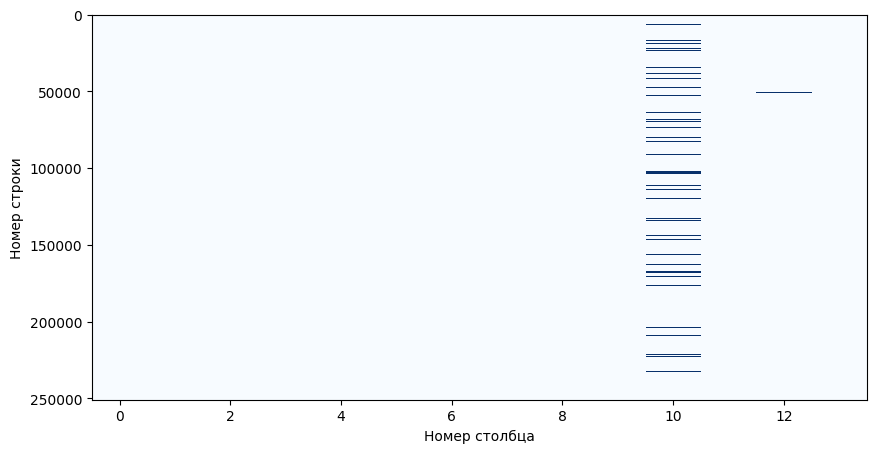

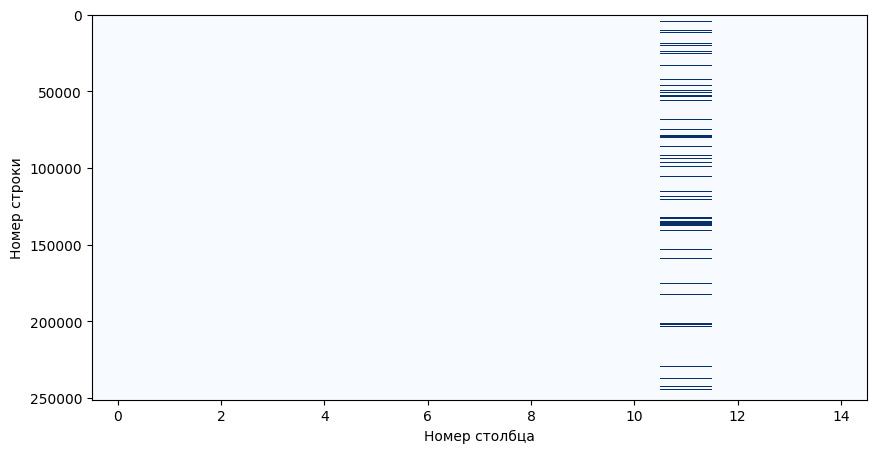

In [54]:
plt.figure(figsize=(10, 5))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="Blues")
plt.xlabel("Номер столбца")
plt.ylabel("Номер строки")
plt.figure(figsize=(10, 5))
plt.imshow(df_original.isna(), aspect="auto", interpolation="nearest", cmap="Blues")
plt.xlabel("Номер столбца")
plt.ylabel("Номер строки")

Ниже мы наблюдаем, что в столбце mileage_in_km данные записывались в разном формате и поэтому он имеет максимальное кол-во уникальных признаков.

<Axes: title={'center': 'Количество уникальных значений по каждому признаку'}>

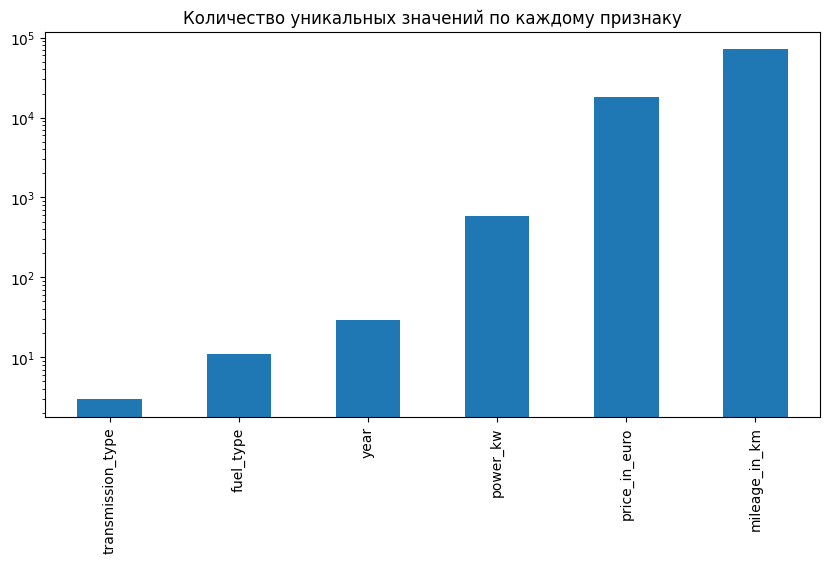

In [71]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(
    logy=True,
    figsize=(10, 5),
    title="Количество уникальных значений по каждому признаку",
)

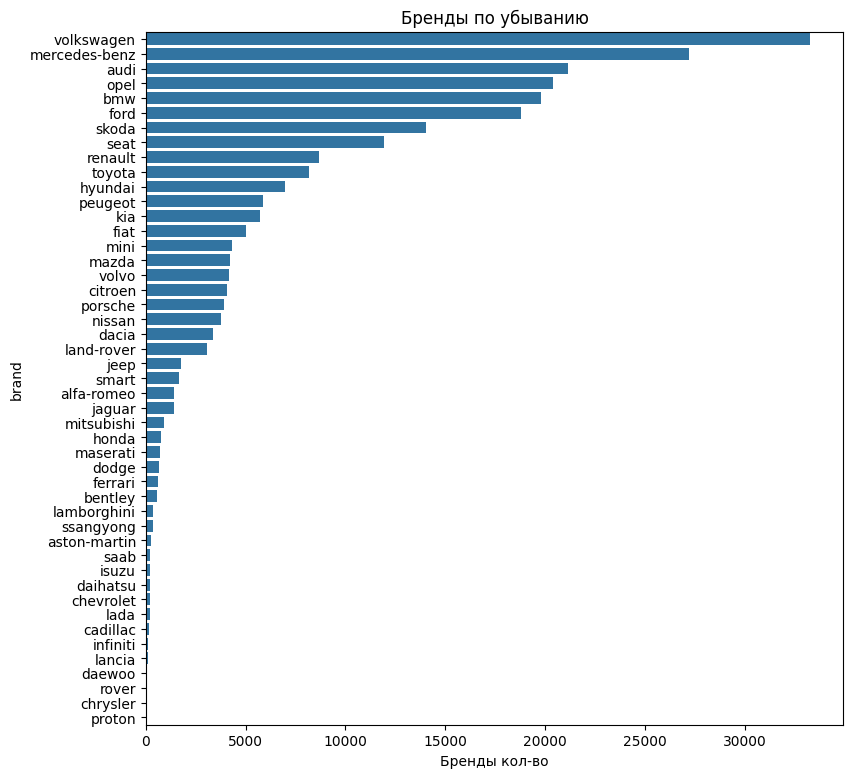

In [65]:
plt.figure(figsize=(9, 9))
sns.countplot(data=df, y="brand", order=df["brand"].value_counts().index)
plt.title("Бренды по убыванию")
plt.xlabel("Бренды кол-во")
plt.show()

transmission_type
2    0.524713
0    0.474023
1    0.001264
Name: proportion, dtype: float64

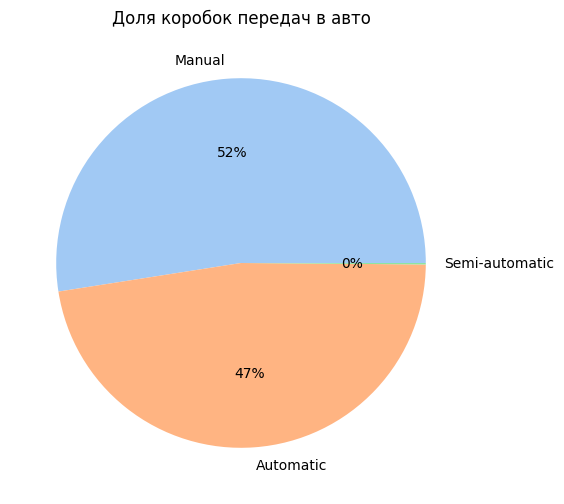

In [70]:
plt.figure(figsize=(6, 6))

data = df["transmission_type"].value_counts(normalize=True)
labels = ["Manual", "Automatic", "Semi-automatic"]
colors = sns.color_palette("pastel")
display(data)
plt.pie(data, labels=labels, colors=colors, autopct="%.0f%%")
plt.title("Доля коробок передач в авто")
plt.show()